In [109]:
import sqlite3 as sql

In [110]:
# create a SQL connection to SQLite database
conn = sql.connect("baseball.sqlite")
cur = conn.cursor()

In [111]:
# list tables in the database
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cur.fetchall())

[('allstarfull',), ('appearances',), ('awardsmanagers',), ('awardsplayers',), ('awardssharemanagers',), ('awardsshareplayers',), ('batting',), ('battingpost',), ('collegeplaying',), ('divisions',), ('fielding',), ('fieldingof',), ('fieldingofsplit',), ('fieldingpost',), ('halloffame',), ('homegames',), ('leagues',), ('managers',), ('managershalf',), ('parks',), ('people',), ('pitching',), ('pitchingpost',), ('salaries',), ('schools',), ('seriespost',), ('teams',), ('teamsfranchises',), ('teamshalf',), ('ryu',)]


In [112]:
# select Ryu's pitching stats
cur.execute("SELECT * FROM pitching WHERE playerID == 'ryuhy01'")
rows = cur.fetchall()
for row in rows:
    print(row)

(42452, 'ryuhy01', 2013, 1, 'LAN', 2729, 'NL', 14, 8, 30, 30, 2, 1, 0, 576, 182, 64, 15, 49, 154, 0.252, 3.0, 4, 5, 1, 0, 783, 0, 67, 7, 3, 26)
(43185, 'ryuhy01', 2014, 1, 'LAN', 2759, 'NL', 14, 7, 26, 26, 0, 0, 0, 456, 152, 57, 8, 29, 139, 0.257, 3.38, 2, 2, 3, 0, 631, 0, 60, 6, 2, 12)
(44802, 'ryuhy01', 2016, 1, 'LAN', 2819, 'NL', 0, 1, 1, 1, 0, 0, 0, 14, 8, 6, 1, 2, 4, 0.364, 11.57, 1, 0, 0, 0, 24, 0, 6, 0, 0, 0)
(45629, 'ryuhy01', 2017, 1, 'LAN', 2849, 'NL', 5, 9, 25, 24, 0, 0, 1, 380, 128, 53, 22, 45, 116, 0.263, 3.77, 3, 4, 4, 1, 541, 1, 58, 4, 1, 11)
(46512, 'ryuhy01', 2018, 1, 'LAN', 2879, 'NL', 7, 3, 15, 15, 0, 0, 0, 247, 68, 18, 9, 15, 89, 0.221, 1.97, 1, 0, 1, 0, 324, 0, 23, 1, 0, 8)
(47422, 'ryuhy01', 2019, 1, 'LAN', 2909, 'NL', 14, 5, 29, 29, 1, 1, 0, 548, 160, 47, 17, 24, 163, 0.234, 2.32, 2, 0, 4, 0, 723, 0, 53, 8, 2, 17)


In [129]:
# select the most recent season for Park
cur.execute("SELECT * FROM pitching WHERE playerID == 'parkch01' ORDER BY yearID DESC LIMIT 1")
print(cur.fetchall())

[(40212, 'parkch01', 2010, 2, 'PIT', 2647, 'NL', 2, 2, 26, 0, 0, 0, 0, 85, 25, 11, 2, 7, 23, 0.227, 3.49, 1, 5, 2, 0, 121, 11, 14, 1, 1, 0)]


In [130]:
# check how many seasons Park has played
cur.execute("SELECT COUNT(*) FROM pitching WHERE playerID == 'parkch01'")
print(cur.fetchall())

[(19,)]


In [113]:
# calculate Ryu's Wins
query1 = """SELECT sum(W) from pitching WHERE playerID == 'ryuhy01'"""
cur.execute(query1)
cur.fetchall()

[(54,)]

In [114]:
# calculate Ryu's Losses
query2 = """SELECT sum(L) from pitching WHERE playerID == 'ryuhy01'"""
cur.execute(query2)
cur.fetchall()

[(33,)]

In [115]:
# calculate Park's Wins
query3 = """SELECT sum(W) from pitching WHERE playerID == 'parkch01'"""
cur.execute(query3)
cur.fetchall()

[(124,)]

In [116]:
# calculate Park's Losses
query4 = """SELECT sum(L) from pitching WHERE playerID == 'parkch01'"""
cur.execute(query4)
cur.fetchall()

[(98,)]

In [117]:
# create a table called pitchers
cur.execute("CREATE TABLE IF NOT EXISTS pitchers (name TEXT NOT NULL, W INTEGER, L INTEGER)")
conn.commit()

In [118]:
# inserts data into pitchers table
cur.execute("""INSERT INTO pitchers (name, W, L) VALUES ('RYU', 54, 33)""")
cur.execute("""INSERT INTO pitchers (name, W, L) VALUES ('PARK', 124, 98)""")
conn.commit()

In [119]:
# read data from pitchers table
cur.execute("""SELECT * FROM pitchers""")
cur.fetchall()

[('RYU', 54, 33), ('PARK', 124, 98)]

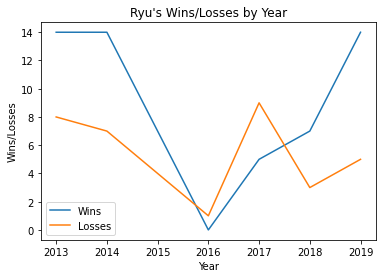

In [132]:
# visualize Ryu's data from database
import matplotlib.pyplot as plt

cur.execute("SELECT * FROM pitching WHERE playerID == 'ryuhy01'")
YEAR = []
Wins = []
Losses = []

for row in cur:
    YEAR.append(row[2])
    Wins.append(row[7])
    Losses.append(row[8])

plt.plot(YEAR, Wins, label = "Wins")
plt.plot(YEAR, Losses, label = "Losses")
plt.xlabel("Year")
plt.ylabel("Wins/Losses")
plt.title("Ryu's Wins/Losses by Year")
plt.legend()
plt.show()

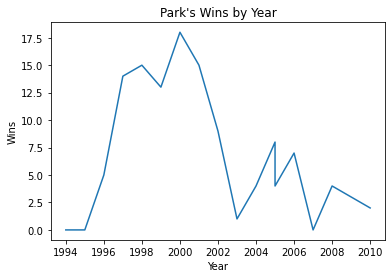

In [131]:
# visualize Park's data from database
import numpy as np
import matplotlib.pyplot as plt

cur.execute("SELECT * FROM pitching WHERE playerID == 'parkch01'")
Year = []
Wins = []

for row in cur:
    Year.append(row[2])
    Wins.append(row[7])

plt.plot(Year, Wins)
plt.xlabel('Year')
plt.ylabel('Wins')
plt.title('Park\'s Wins by Year')
plt.show()